<a href="https://colab.research.google.com/github/abhranil-datascience/DeepLearning/blob/ImageAnalytics/DogsVsCatsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')

############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Dataset')

########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#################### Define Constant Folder Names and Get File Paths ###########################
DatasetDirectory='/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Dataset'
TrainingSet="training_set"
TestSet="test_set"
TrainingSetDirectory=DatasetDirectory+"/"+TrainingSet
TestSetDirectory=DatasetDirectory+"/"+TestSet
cat_directory="cats"
dog_directory="dogs"
TrainingSetCatDirectory=TrainingSetDirectory+"/"+cat_directory
TrainingSetDogDirectory=TrainingSetDirectory+"/"+dog_directory
FilePathsCatTrainingSet=[TrainingSetCatDirectory+"/"+fname for fname in os.listdir(TrainingSetCatDirectory) if '.jpg' in fname]
FilePathsDogTrainingSet=[TrainingSetDogDirectory+"/"+fname for fname in os.listdir(TrainingSetDogDirectory) if '.jpg' in fname]
TrainingSetFilePaths=FilePathsCatTrainingSet+FilePathsDogTrainingSet
import random
random.shuffle(TrainingSetFilePaths)
print("Number Of Training Set Cats: "+str(len(FilePathsCatTrainingSet))+ " || "+ 
      "Number Of Training Set Dogs: "+str(len(FilePathsDogTrainingSet))+ " || "+ 
      "Number of Training Set Images: "+str(len(TrainingSetFilePaths)))

Number Of Training Set Cats: 3928 || Number Of Training Set Dogs: 4000 || Number of Training Set Images: 7928


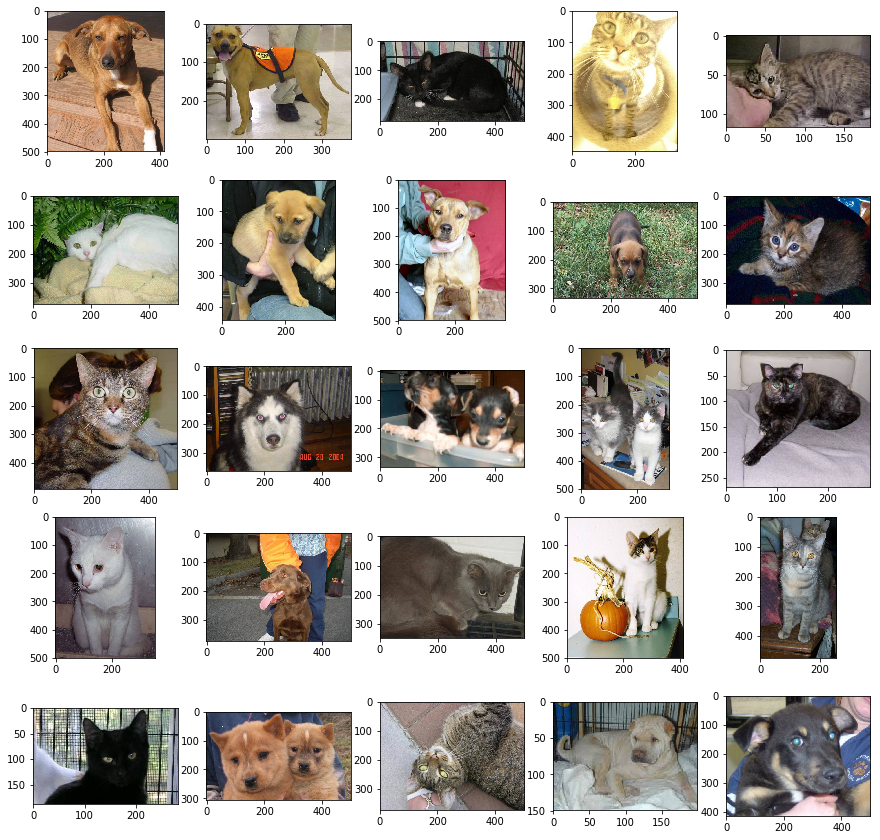

In [0]:
##################################### Visualize Data Set ##################################################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig=plt.figure(figsize=(15,15))
columns = 5
rows = 5
for count in range(0,25):
  img=mpimg.imread(TrainingSetFilePaths[count])
  fig.add_subplot(rows, columns, count+1)
  imgplot = plt.imshow(img)
plt.show()

In [0]:
#################### Create Image Generator and Preprocess ################################################
from keras.preprocessing.image import ImageDataGenerator
train_image_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_image_generator=ImageDataGenerator(rescale=1./255)
training_set=train_image_generator.flow_from_directory(directory=TrainingSet,target_size=(180,180),classes=['cats','dogs'],class_mode='binary',batch_size=128, shuffle=True)
#training_set.class_indices ==> {'cats': 0, 'dogs': 1}
test_set=test_image_generator.flow_from_directory(directory=TestSetDirectory,target_size=(180,180),classes=['cats','dogs'],class_mode='binary',batch_size=128, shuffle=True)
#test_set.class_indices ==> {'cats': 0, 'dogs': 1}

Found 7928 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
#################################################### Create Callbacks ###########################################################
BestModel="/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/BestModel/best_model.hdf5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
save_best_model=ModelCheckpoint(filepath=BestModel,monitor='val_acc',save_best_only=True,mode='max',verbose=2)
early_stopping=EarlyStopping(monitor='val_acc',min_delta=0.003,patience=25,mode='max',restore_best_weights=True,verbose=2)

In [0]:
################################################## Create Model #################################################################
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPool2D,BatchNormalization,Flatten,Dense,Dropout
classifier=Sequential()
#--------------- 2. Convolution --------------------------
classifier.add(Convolution2D(input_shape=(180,180,3),filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'))
#--------------- 3. Max Pooling --------------------------
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
#--------------- 4. Convolution --------------------------
classifier.add(Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
#--------------- 5. Max Pooling --------------------------
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
#--------------- 4. Convolution --------------------------
classifier.add(Convolution2D(filters=128,kernel_size=(3,3),strides=(1,1),activation='relu'))
#--------------- 5. Max Pooling --------------------------
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
#--------------- 4. Convolution --------------------------
classifier.add(Convolution2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu'))
#--------------- 5. Max Pooling --------------------------
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
#--------------- 6. Flattening ---------------------------
classifier.add(Flatten())
#--------------- 7. Full Connection ----------------------
classifier.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(0.6))
classifier.add(Dense(units=96,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
#--------8. Deal with the weights and Loss function --------
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
Classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 87, 87, 64)        9472      
_________________________________________________________________
batch_normalization_1 (Batch (None, 87, 87, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 39, 39, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)      

In [0]:
########################### Fit Generator ###################################
Classifier.fit_generator(generator=training_set,steps_per_epoch=7928/128,epochs=100,callbacks=[save_best_model,early_stopping],
                         validation_data=test_set,validation_steps=2000/128)

Epoch 1/100
62/61 [==============================] - 74s 1s/step - loss: 0.3936 - acc: 0.8233 - val_loss: 0.5924 - val_acc: 0.6760

Epoch 00001: val_acc did not improve from 0.77850
Epoch 2/100
62/61 [==============================] - 72s 1s/step - loss: 0.3834 - acc: 0.8311 - val_loss: 0.5611 - val_acc: 0.7170

Epoch 00002: val_acc did not improve from 0.77850
Epoch 3/100
62/61 [==============================] - 72s 1s/step - loss: 0.3842 - acc: 0.8343 - val_loss: 0.6675 - val_acc: 0.7095

Epoch 00003: val_acc did not improve from 0.77850
Epoch 4/100
62/61 [==============================] - 72s 1s/step - loss: 0.3776 - acc: 0.8336 - val_loss: 0.4948 - val_acc: 0.7625

Epoch 00004: val_acc did not improve from 0.77850
Epoch 5/100
62/61 [==============================] - 72s 1s/step - loss: 0.3691 - acc: 0.8444 - val_loss: 0.4881 - val_acc: 0.7670

Epoch 00005: val_acc did not improve from 0.77850
Epoch 6/100
62/61 [==============================] - 72s 1s/step - loss: 0.3540 - acc: 0.8

In [0]:
################################## Test on New Images ########################################
from keras.models import load_model
best_model=load_model(BestModel)
PredictionDirectory='/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Test/Images'
import numpy as np
from skimage.io import imread
from skimage.transform import resize
for img in os.listdir(PredictionDirectory):
  img_path=PredictionDirectory+"/"+img
  curr_img=imread(img_path)
  curr_img_resized=resize(curr_img,output_shape=(180,180))
  curr_img=np.expand_dims(curr_img_resized,axis=0)
  curr_pred=best_model.predict(curr_img)
  if curr_pred > 0.5:
    print("Filename: "+img+" || Prediction: Dog")
  else:
    print("Filename: "+img+" || Prediction: Cat")


Filename: Picture2_cat.jpg || Prediction: Cat
Filename: Picture3_cat.jpg || Prediction: Cat
Filename: Picture4_dog.jpg || Prediction: Dog
Filename: Picture6_dog.jpg || Prediction: Dog
Filename: Picture5_dog.jpg || Prediction: Dog
Filename: Picture1_cat.jpg || Prediction: Cat
